# **Hotel Booking Dataset**
---

**Context**

Di dalam bisnis perhotelan, memastikan ketersediaan kamar hotel di suatu waktu dan untuk beberapa waktu yang akan datang sangat penting dalam mengoptimalkan pendapatan. Informasi mengenai ketersediaan kamar yang akurat dan aktual dapat menghindarkan hotel dari berbagai kerugian, semisal kerugian yang disebabkan oleh tamu yang membatalkan pesanan atau tidak melakukan check in di waktu kedatangannya.

Tamu yang membatalkan penginapannya, baik setelah mengabari pihak hotel terlebih dahulu (misalkan menghubungi sendiri atau dihubungi pihak hotel) maupun tidak, menyebabkan kekosongan kamar yang seharusnya mereka inapi. Kamar-kamar ini sebenarnya masih dapat disewakan kembali ke tamu yang lainnya, namun akan lebih sulit untuk memutuskan dengan segera kamar mana saja yang dapat disewakan kembali apabila kabar pembatalan oleh tamu diterima pihak hotel secara mendadak, semisal beberapa saat sebelum waktu check in.

Diberikan sebuah dataset berisi informasi pemesanan kamar hotel, Anda diminta untuk membangun sebuah model untuk memprediksi apakah seorang pelanggan yang telah memesan sebuah kamar akan membatalkan pesanannya. Model Anda diharapkan dapat menjadi salah satu sarana untuk mengidentifikasi pembatalan pesanan dengan lebih dini sehingga dapat mengurangi risiko kerugian akibat pembatalan pesanan seperti yang dijelaskan di atas.

**Business Objective**

Tujuan bisnis yang dicapai adalah untuk mendapatkan pendapatan tertinggi dengan memaksimalkan jumlah ruangan yang tersedia di hotel. Cara memaksimalkan ruangannya adalah dengan melakukan prediksi menggunakan machine learning sehingga kita tahu siapa yang akan membatalkan pesanannya dan menghindari kerugian.

**Output**

Output yang dihasilkan dari proyek ini berupa label apakah seseorang akan membatalkan pesanannya atau tidak. Label ini bersifat binary dimana artinya hanya ada 2 kemungkinan (value). Dengan mengetahui label ini, kita dapat mengidentifikasi atau mengelompokkan customer yang membatalkan pesanan.

**Machine Learning Task**

Model machine learning yang digunakan dalam proyek ini adalah supervised machine learning dikarenakan di dalam dataset yang diberikan, sudah terdapat *ground truth* atau penanda apakah seseorang membatalkan pesanannya atau tidak. Untuk teknik supervisednya sendiri, model yang digunakan adalah binary classification karena hanya terdapat 2 buah label. 

**Performance Measure**

Untuk mengecek keakuratan dari model, performance measure yang digunakan untuk kasus ini adalah F1 score dimana F! score sendiri merupakan harmonic mean dari precision dan recall.

**Risk**

Risiko yang mungkin terjadi akibat dari model adalah customer yang tidak membatalkan pesanannya bisa dilabel membatalkan pesanan oleh model machine learning yang dibuat.

**Acknowledgements**

Dataset ini diambil dari sebuah artikel Hotel Booking Demand Datasets, yang ditulis oleh Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.


# **Machine Learning Pipeline**
---

1. Problem Framing
2. Exploratory Data Analysis
3. Data Preparation
4. Model Training
5. Evaluation, Model Selection, and Model Tuning
6. Result, Conclusion, and Recommendation

# 1. Exploratory Data Analysis

In [ ]:
!pip install optuna

In [ ]:
# Dataframe
import pandas as pd

# Numeric calculation
import numpy as np
import statistics as st
from collections import Counter

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# XGboost
from xgboost import XGBClassifier

# Optuna
import optuna

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/elvanselvano/Ujian-Modul-3/main/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Untuk melakukan EDA, alangkah baiknya kita mengetahui column mana yang merupakan categorical dan numerical. Hal ini berguna untuk menentukan tipe visualisasi yang nantinya dapat dilakukan.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Dapat kita lihat, terdapat 12 column object diantaranya: hotel, arrival_date_month, meal, country, market_segment, distribution_channel, reserved_room_type, assigned_room_type, deposit_type, customer_type, reservation_status dan reservation_status_date.

In [ ]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


In [ ]:
df.corr()['is_canceled'].abs().sort_values(ascending = False)

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

Untuk mempersingkat proses EDA, kita tidak akan melakukan EDA terhadap keseluruhan kolum namun hanya untuk kolum-kolum yang memang memiliki pengaruh tinggi terhadap target variabel yaitu is_canceled.

In [ ]:
def analyze(column):
  data = {}
  data['Column'] = column.name
  data['Mean'] = st.mean(column)
  data['Mode'] = Counter(column).most_common()[0][0]
  data['Median'] = st.median(column)
  data['Variance'] = st.variance(column)
  data['Standard Deviation'] = st.stdev(column)
  data['Skew'] = column.skew()
  return pd.DataFrame([data])

def dataframe_analysis(df):
  result = pd.DataFrame()

  for col in df.columns:
    analysis = analyze(df[col])
    result = result.append(analysis)

  return result.reset_index(drop=True)

def plot_distribution(column):
  f, (ax_box, ax_hist) = plt.subplots(nrows=2, 
                                      sharex=True, 
                                      figsize=(8, 5),
                                      gridspec_kw={"height_ratios": {0.2, 1}})
  
  info = analyze(column)
  mean = info['Mean'].values[0]
  median = info['Median'].values[0]
  mode = info['Mode'].values[0]

  sns.boxplot(x=column, ax=ax_box)
  ax_box.axvline(mean, color='r', linestyle='--')
  ax_box.axvline(median, color='g', linestyle=':')
  ax_box.axvline(mode, color='b', linestyle='-')
  ax_box.set(xlabel='')

  sns.histplot(x=column, ax=ax_hist, kde=True)
  ax_hist.axvline(mean, color='r', linestyle='--')
  ax_hist.axvline(median, color='g', linestyle=':')
  ax_hist.axvline(mode, color='b', linestyle='-')

  plt.legend({'Mean':mean, 'Median':median, 'Mode':mode})
  plt.show()

Berdasarkan analisa distribusi lead time, dapat kita lihat bahwa mayoritas customer memiliki lead_time antara 0 hingga 200. Untuk kolum ini, juga terdapat sangat banyak outlier di angka di atas 400. Fitur ini juga memiliki korelasi tinggi terhadap is_canceled sehingga dengan melihat distribusi ini, kemungkinan besar model machine learning kita akan terbantu karena bisa saja data point yang outlier cenderung melakukan pembatalan atau sebaliknya.

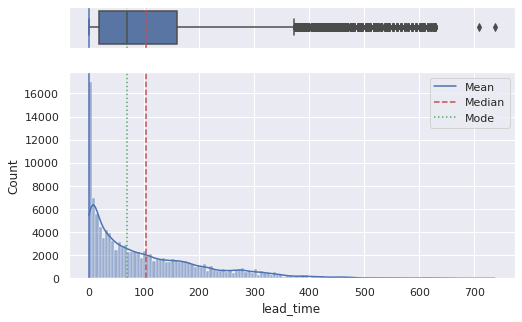

In [ ]:
plot_distribution(df['lead_time'])

Analisa distribusi special request menunjukkan mayoritas orang hanya melakukan request antara 0 sampai 1 kali saja. 

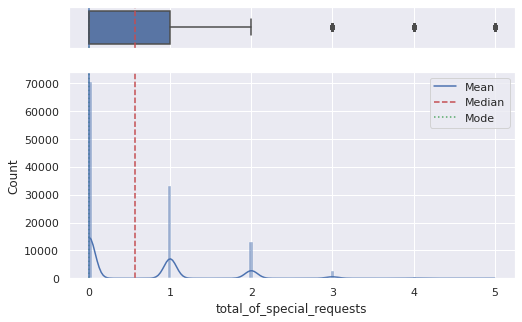

In [ ]:
plot_distribution(df['total_of_special_requests'])

Analisa parking spaces menunjukkan kebanyakan data point memiliki nilai 0.

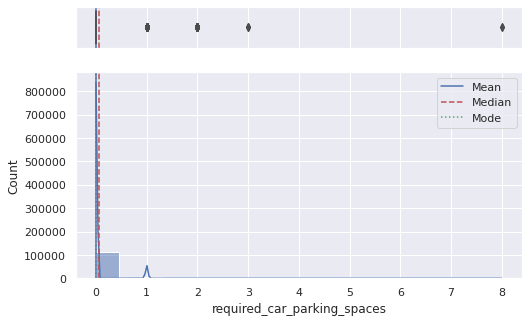

In [ ]:
plot_distribution(df['required_car_parking_spaces'])

Dari analisa distribusi, dapat dengan mudah kita bilang bahwa kebanyakan kolum memiliki distribusi skewed yang diakibatkan oleh adanya outlier pada kolum-kolum tersebut. Informasi ini dapat kita gunakan saat modeling karena tidak semua model machine learning mampu menghandle kasus outlier dengan baik.

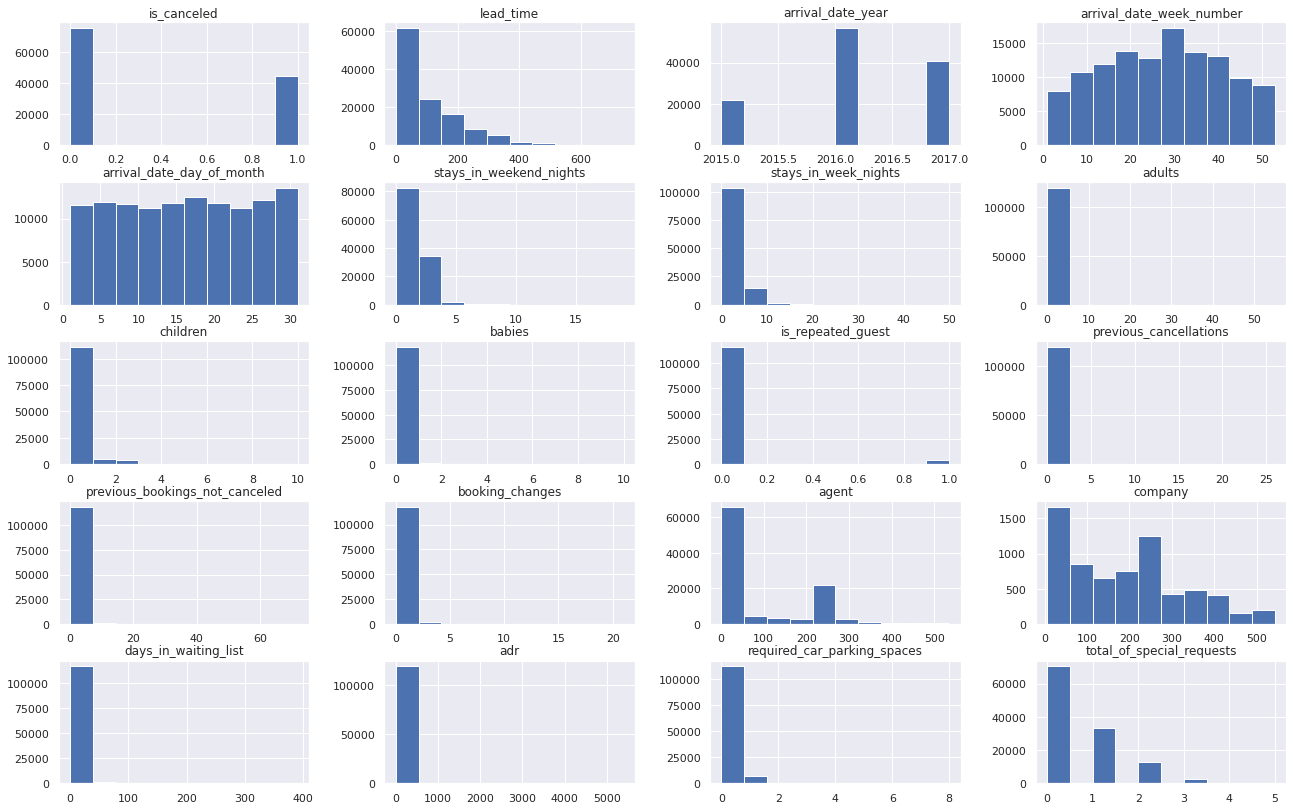

In [ ]:
df.hist(figsize=(22, 14))
plt.show()

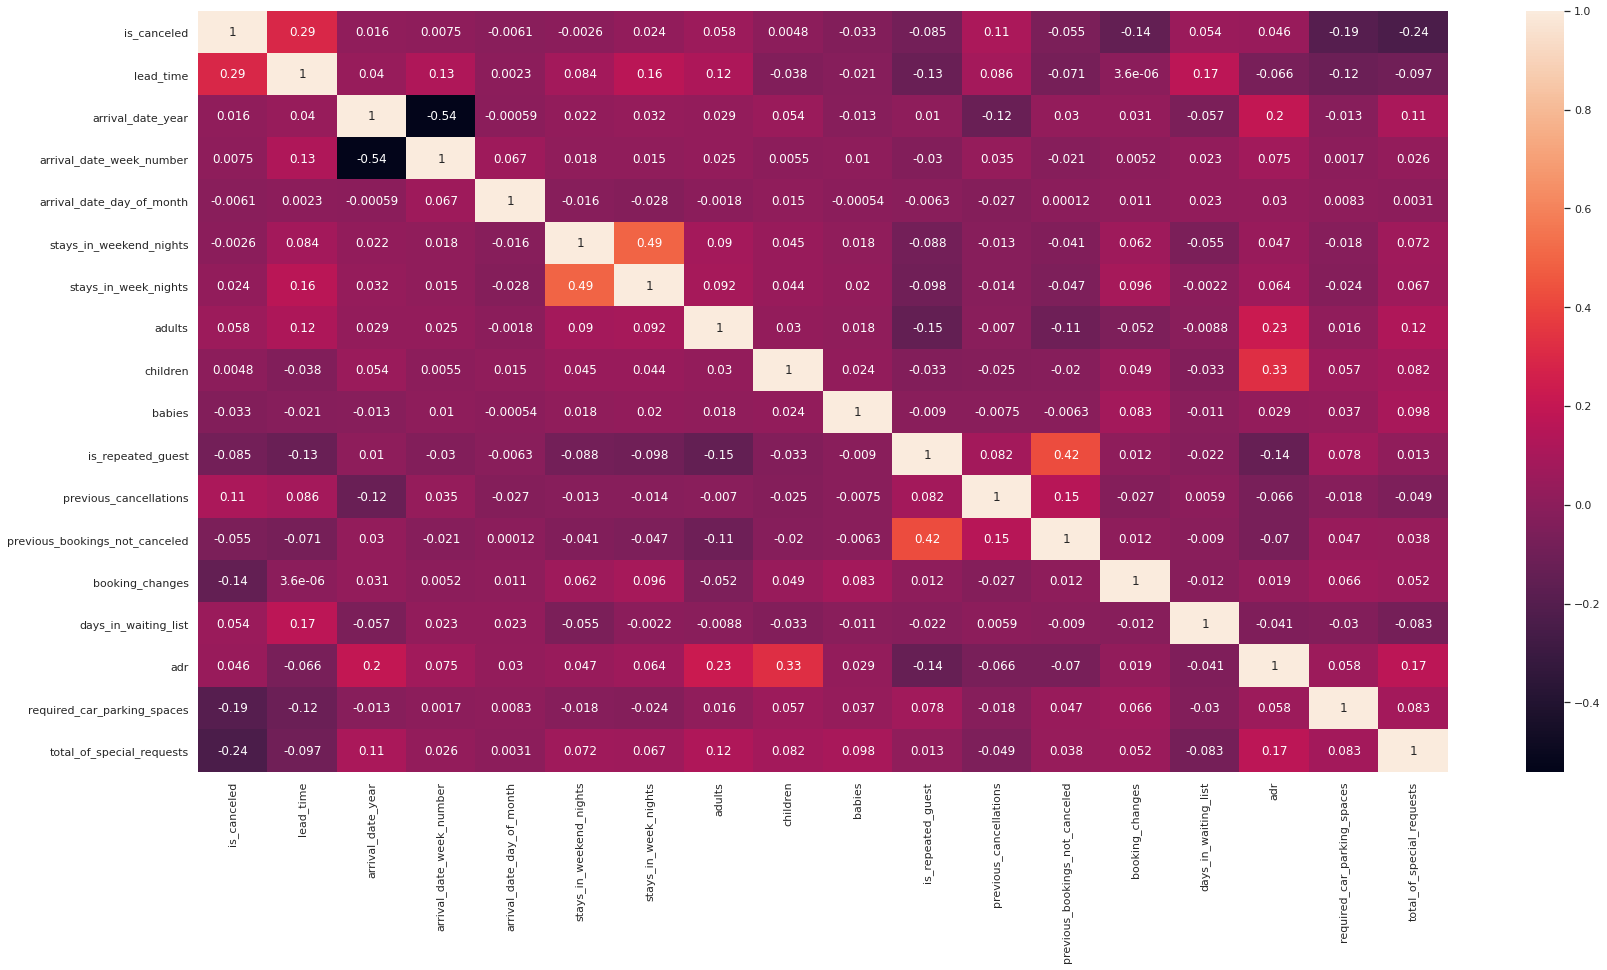

In [ ]:
plt.figure(figsize=(28,14))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

# 2. Data Preparation

Missing values yang terdapat di kolum children, country, agent, dan company akan dihapus. Hal ini juga berguna untuk proses modeling.

Untuk kolum agent dan company, kita bisa lihat bahwa terdapat 16340 dan 112593 missing values dimana jika kita melakukan proses impute tentunya akan berbahaya karena jumlah missing yang terlalu tinggi. Oleh karena itu, untuk kedua kolum ini dapat dihapus dari dataset.

Sedangkan untuk kolum children dan country yang terdapat 4 dan 488 missing values dapat didrop berdasarkan row.

In [ ]:
df.shape

(119390, 32)

In [ ]:
df_cleaned = df.drop(['agent', 'company'], axis=1)

In [ ]:
df_cleaned = df_cleaned.dropna()

In [ ]:
df_cleaned.shape

(118898, 30)

Setelah kolum-kolum tersebut dipreprocess, kita mendapatkan total 118898 rows dengan 30 columns.

In [ ]:
df_cleaned.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
df_cleaned.drop(['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list'], axis = 1, inplace = True)

In [ ]:
df_cleaned['reservation_status_date'] = pd.to_datetime(df_cleaned['reservation_status_date'])

df_cleaned['year'] = df_cleaned['reservation_status_date'].dt.year
df_cleaned['month'] = df_cleaned['reservation_status_date'].dt.month
df_cleaned['day'] = df_cleaned['reservation_status_date'].dt.day

In [ ]:
df_cleaned.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

In [ ]:
df_cleaned.sample(5)

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,year,month,day
73449,City Hotel,1,189,34,22,0,3,2,0.0,0,BB,Offline TA/TO,TA/TO,0,0,0,A,No Deposit,Transient,80.10,0,1,2017,2,15
67334,City Hotel,1,118,18,1,1,4,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,No Deposit,Transient,126.00,0,1,2017,1,3
106539,City Hotel,0,134,8,25,0,1,2,0.0,0,BB,Groups,TA/TO,0,0,0,A,No Deposit,Transient-Party,75.00,0,0,2017,2,26
38736,Resort Hotel,0,305,29,21,2,5,3,0.0,0,BB,Online TA,TA/TO,0,0,0,C,No Deposit,Transient,139.68,0,0,2017,7,28
72333,City Hotel,1,116,30,26,0,4,2,0.0,0,BB,Direct,Direct,0,0,0,A,No Deposit,Transient,112.50,0,0,2017,6,27


Sebelum melakukan modeling, semua data object akan dikonversi ke dalam bentuk angka menggunakan Label Encoder.

In [ ]:
cat_cols = []

for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object':
        cat_cols.append(col)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

for col in cat_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

In [ ]:
df_cleaned.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,year,month,day
0,1,0,342,27,1,0,0,2,0.0,0,0,3,1,0,0,0,2,0,2,0.0,0,0,2015,7,1
1,1,0,737,27,1,0,0,2,0.0,0,0,3,1,0,0,0,2,0,2,0.0,0,0,2015,7,1
2,1,0,7,27,1,0,1,1,0.0,0,0,3,1,0,0,0,0,0,2,75.0,0,0,2015,7,2
3,1,0,13,27,1,0,1,1,0.0,0,0,2,0,0,0,0,0,0,2,75.0,0,0,2015,7,2
4,1,0,14,27,1,0,2,2,0.0,0,0,6,3,0,0,0,0,0,2,98.0,0,1,2015,7,3


Setelah melakukan encoding dengan label encoder, dapat kita lihat bahwa semua column sekarang memiliki tipe data int64 atau float64. Hal ini bertujuan untuk melakukan model training dimana kebanyakan model tidak bisa memproses tipe data object.

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  int64  
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_week_number        118898 non-null  int64  
 4   arrival_date_day_of_month       118898 non-null  int64  
 5   stays_in_weekend_nights         118898 non-null  int64  
 6   stays_in_week_nights            118898 non-null  int64  
 7   adults                          118898 non-null  int64  
 8   children                        118898 non-null  float64
 9   babies                          118898 non-null  int64  
 10  meal                            118898 non-null  int64  
 11  market_segment                  118898 non-null  int64  
 12  distribution_cha

Berdasarkan analisa korelasi, didapatkan bahwa 5 feature utama untuk penentuan is_canceled adalah deposit_type, lead_time, total_of_special_requests, required_car_parking_spaces, dan distribution_channel.

In [ ]:
df_cleaned.corr()['is_canceled'].abs().sort_values(ascending = False)

is_canceled                       1.000000
deposit_type                      0.468497
lead_time                         0.291994
total_of_special_requests         0.235643
required_car_parking_spaces       0.194796
distribution_channel              0.165539
hotel                             0.133964
year                              0.117526
previous_cancellations            0.109922
is_repeated_guest                 0.085179
month                             0.069364
customer_type                     0.068768
reserved_room_type                0.062230
adults                            0.058381
market_segment                    0.056948
previous_bookings_not_canceled    0.055493
adr                               0.046199
day                               0.034062
babies                            0.032521
stays_in_week_nights              0.024110
meal                              0.018657
arrival_date_week_number          0.007465
arrival_date_day_of_month         0.006127
children   

# 4. Model Training

In [ ]:
X = df_cleaned.drop('is_canceled', axis=1)
y = df_cleaned['is_canceled']

In [ ]:
X.shape

(118898, 24)

In [ ]:
y.shape

(118898,)

In [ ]:
def model_evaluation(X, y, model, name):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
  model.fit(X_train, y_train)
  preds = model.predict(X_test)

  # Generate classification report
  print(classification_report(y_test, preds, target_names=['0', '1']))
  print('Average F1 score on training set (5-fold CV):', cv_scores.mean())
  print('F1 score on testing set:', f1_score(y_test, preds))

  # Create dictionaries
  train = {'model': name, 'category': 'training', 'score': cv_scores.mean()}
  test = {'model': name, 'category': 'testing', 'score': f1_score(y_test, preds)}
  result = [train, test]

  return pd.DataFrame.from_records(result)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
evaluation = pd.DataFrame(columns=['model', 'category', 'score'])
evaluation

,model,category,score


# 5. Evaluation, Model Selection, and Model Tuning

Untuk model yang digunakan dalam kasus binary classification ini, saya menggunakan 3 buah model boosting dan bagging diantaranya adalah: Random Forest, AdaBoost Classifier, dan XGBoost Classifier.

Ketiga model ini merupakan model SOTA (state-of-the-art) karena merupakan gabungan dari weak-learner yang dibagging atau boosting menjadi satu model yang mampu memberikan akurasi yang baik.

### 5.1 Random Forest

Dari analisa nilai F1 pada training (cross validation 5 fold) dan testing, didapatkan bahwa selisih scorenya tidak berbeda jauh. Nilainya juga bisa dibilang sangat tinggi karena berada di atas nilai 0.9 yang artinya model memiliki performa yang tinggi. Selain itu, model juga tidak mengalami underfitting maupun overfitting yang dibuktikan dengan selisih yang rendah antara nilai cross-validation dan testing.

In [ ]:
rf = RandomForestClassifier(n_jobs = -1, max_features='sqrt', random_state=42)
result = model_evaluation(X, y, rf, 'RandomForestClassifier')
evaluation = evaluation.append(result)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     14851
           1       0.99      0.89      0.93      8929

    accuracy                           0.95     23780
   macro avg       0.96      0.94      0.95     23780
weighted avg       0.96      0.95      0.95     23780

Average F1 score on training set (5-fold CV): 0.9319545786282853
F1 score on testing set: 0.9347018226862501


### 5.2 AdaBoost Classifier

Dari analisa nilai F1 pada training (cross validation 5 fold), kita dapat melihat selisih yang sangat dekat sama dengan Random Forest dimana selisih antara training dan testing tidak sampai 0.1 yang menandakan performa model stabil.

In [ ]:
ada = AdaBoostClassifier(n_estimators = 1000, learning_rate = 0.05, random_state=42)
result = model_evaluation(X, y, ada, 'AdaBoostClassifier')
evaluation = evaluation.append(result)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     14851
           1       0.87      0.62      0.73      8929

    accuracy                           0.82     23780
   macro avg       0.84      0.78      0.80     23780
weighted avg       0.83      0.82      0.82     23780

Average F1 score on training set (5-fold CV): 0.7265194244716777
F1 score on testing set: 0.7254608219891876


### 5.3 XGBoost Classifier

Dengan menggunakan XGBoost, kita juga bisa melihat kondisi serupa dimana nilai training dan testing tidak berbeda jauh. Hal ini cukup wajar untuk ditemui karena tiga model yang digunakan merupakan kumpulan weak-learner dimana tentunya model boosting dan bagging memiliki kestabilan yang sangat tinggi dalam memprediksi.

In [ ]:
xgb = XGBClassifier(learning_rate = 0.01, n_estimators = 1000, max_depth = 4, n_jobs = -1, random_state=42)
result = model_evaluation(X, y, xgb, 'XGBClassifier')
evaluation = evaluation.append(result)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[04:14:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:15:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:16:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:17:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

### 5.4 Visualize Models

Setelah melakukan training (cross validation 5-fold) dan testing menggunakan 3 model state-of-the-art di atas, kita dapat melakukan visualisasi untuk melihat model mana yang memiliki nilai F1 score (harmonic mean recall dan precision) tertinggi.

Didapatkan bahwa model RandomForest dan XGBoost memiliki score yang serupa namun jika dilihat lagi, model random forest memiliki score tertinggi. Sedangkan untuk AdaBoost, kita dapat melihat nilai F1 scorenya berada di kisaran 0.7 dimana jika kita bandingkan dengan model lainnya dapat dibilang bahwa AdaBoost kurang cocok untuk dataset yang digunakan.

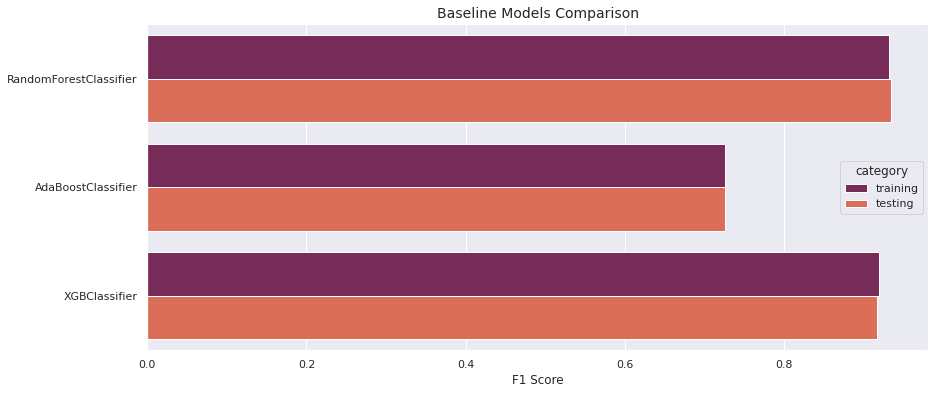

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(y='model', x='score', data=evaluation, hue='category', palette='rocket')
plt.title('Baseline Models Comparison', size=14)
plt.ylabel('')
plt.xlabel('F1 Score')
plt.show()

## 5.5 Hyperparamater Tuning Using Optuna

Setelah mendapati bahwa model RandomForest memiliki performa tertinggi, langkah selanjutnya adalah melakukan hyperparameter tuning menggunakan library Optuna. Library ini mampu mencari komposisi parameter terbaik yang dapat digunakan oleh model untuk mencapai kapabilitas maksimalnya.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('Training Data: ', X_train.shape)
print('Testing Data: ', X_test.shape)
print('Training Target: ', y_train.shape)
print('Testing Target: ', y_test.shape)

Training Data:  (95118, 24)
Testing Data:  (23780, 24)
Training Target:  (95118,)
Testing Target:  (23780,)


Untuk mempersingkat proses tuning, saya menggunakan 5 trial dimana model akan mencari 5 komposisi parameter dan mencoba mendapatkan nilai tertinggi. 

In [ ]:
def objective(trial, X_train=X_train, y_train=y_train):
  criterions = trial.suggest_categorical('criterion', ['gini', 'entropy'])
  max_depth = trial.suggest_int("max_depth", 2, 32, log=True)

  clf = RandomForestClassifier(n_estimators=1000, 
                               max_depth=max_depth,
                               n_jobs = -1, 
                               max_features='sqrt',
                               criterion=criterions)
  
  clf.fit(X_train, y_train)
  preds = clf.predict(X_test)
  return f1_score(y_test, preds)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)

[I 2021-07-04 04:33:04,160] A new study created in memory with name: no-name-bb89e855-9211-4075-9279-980950030d34
[I 2021-07-04 04:34:30,558] Trial 0 finished with value: 0.9090472185510033 and parameters: {'criterion': 'gini', 'max_depth': 21}. Best is trial 0 with value: 0.9090472185510033.
[I 2021-07-04 04:35:59,729] Trial 1 finished with value: 0.8857334389664209 and parameters: {'criterion': 'entropy', 'max_depth': 19}. Best is trial 0 with value: 0.9090472185510033.
[I 2021-07-04 04:36:19,114] Trial 2 finished with value: 0.5254404742301992 and parameters: {'criterion': 'gini', 'max_depth': 2}. Best is trial 0 with value: 0.9090472185510033.
[I 2021-07-04 04:36:43,175] Trial 3 finished with value: 0.5424363251688502 and parameters: {'criterion': 'gini', 'max_depth': 3}. Best is trial 0 with value: 0.9090472185510033.
[I 2021-07-04 04:38:21,387] Trial 4 finished with value: 0.9127573001436093 and parameters: {'criterion': 'entropy', 'max_depth': 22}. Best is trial 4 with value: 0.

In [ ]:
trial = study.best_trial
print('Best F1 Score: {}'.format(trial.value))

Best F1 Score: 0.9127573001436093


In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

### 5.6 Create Model with Best Parameter

In [ ]:
best_trial = study.best_trial.params
best_trial

{'criterion': 'entropy', 'max_depth': 22}

In [ ]:
rfc_tuned = RandomForestClassifier(criterion='gini', n_estimators=1000, 
                                   max_depth=32, n_jobs = -1, max_features='sqrt',
                                   random_state=42)
rfc_tuned.fit(X_train, y_train)
preds = rfc_tuned.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, preds, target_names=target_names))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     14851
           1       0.99      0.89      0.94      8929

    accuracy                           0.96     23780
   macro avg       0.96      0.94      0.95     23780
weighted avg       0.96      0.96      0.95     23780



### 5.7 AUC-ROC Curve


- **Sensitivity / True Positive Rate / Recall** tells us what proportion of the positive class got correctly classified.

  Formula: TP/(TP+FN)

  Example: proportion of the actual sick people were correctly detected by the model.

- **False Negative Rate** tells us what proportion of the positive class got incorrectly classified by the classifier. A higher TPR and a lower FNR is desirable if we want to correctly classify the positive class.

  Formula: FN/(TP+FN)

- **Specificity / True Negative Rate** tells us what proportion of the negative class got correctly classified.

  Formula: TN/(TN+FP)

  Example: proportion of healthy people who were correctly identified by the model.

- **False Positive Rate** tells us what proportion of the negative class got incorrectly classified by the classifier. A higher TNR and a lower FPR is desirable if we want to correctly classify the negative class.

  Formula: FP/(TN+FP) = 1 - Specificity

The **Receiver Operator Characteristic** (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the **TPR** against **FPR** at various threshold values and essentially **separates the ‘signal’ from the ‘noise’**. The **Area Under the Curve** (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

*The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.*

Source: https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/


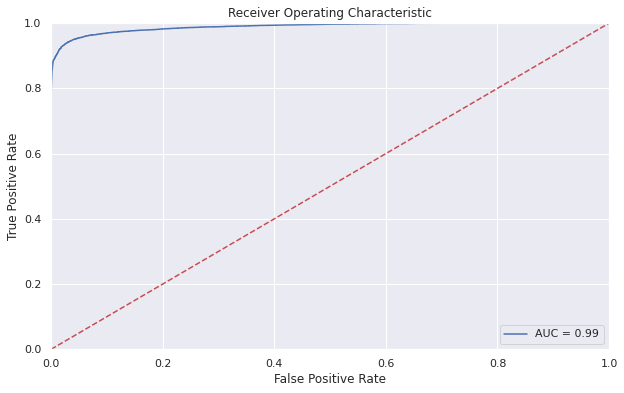

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score

# calculate the fpr and tpr for all thresholds of the classification
probs = rfc_tuned.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 6. Result, Conclusion, and Recommendation

Berdasarkan performa model machine learning yang telah dibangun, didapatkan bahwa performa model sangatbaik dengan nilai F1 score di atas 0.9. Selain performa tinggi, model yang dibuat juga memiliki kestabilan yang sangat tinggi. Hal ini terbukti karena selisih score yang sangat kecil ketika proses training dan testing dari model.

Hal ini tentunya dapat membantu pihak hotel dalam menentukan apakah seseorang akan membatalkan pesanannya atau tidak. Selain itu, kita juga dapat menganalisa hal-hal apa saja yang paling berpengaruh terhadap cancellation suatu kamar. Dengan begitu, kita dapat lebih mengerti mengenai customer yang kita miliki.

